In [7]:
"""
Justin Huang 101073186
GENERAL NOTE: Please print out numbers (i.e., accuracies, plots, etc.) so they are visible without me having to run your colab notebook. Use python's print() function.
"""

# import everything you might need

import torch
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd
from xgboost import XGBClassifier
import random
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

**QUESTION 1**

In [8]:
"""
Q1: Calculate the gradient of the f(x, y, z) = 7x2z – 2xy3 + 5z at (-1, -2, 3). What does this vector represent?

YOUR ANSWER HERE

This vector represents the direction that the function changes the most
"""

'\nQ1: Calculate the gradient of the f(x, y, z) = 7x2z – 2xy3 + 5z at (-1, -2, 3). What does this vector represent?\n\nYOUR ANSWER HERE\n\nThis vector represents the direction that the function changes the most\n'

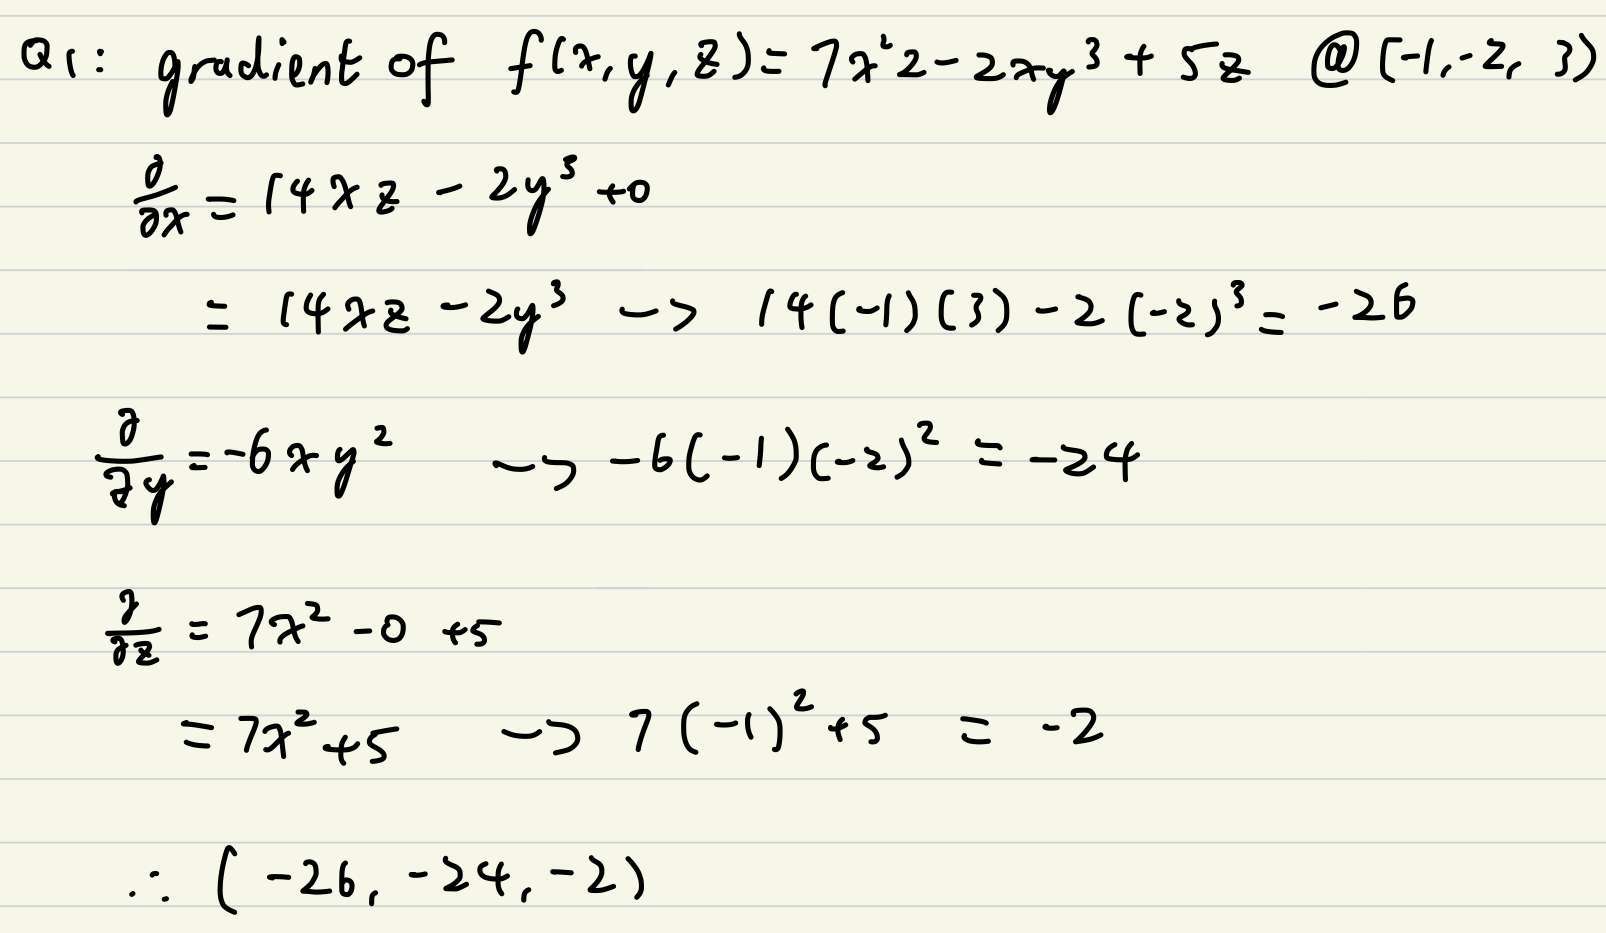

**QUESTION 2**

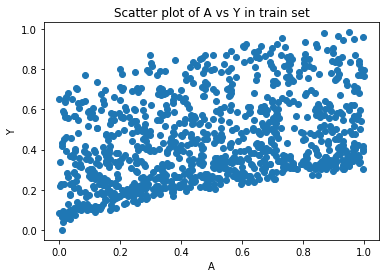

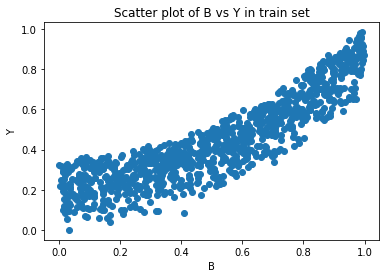

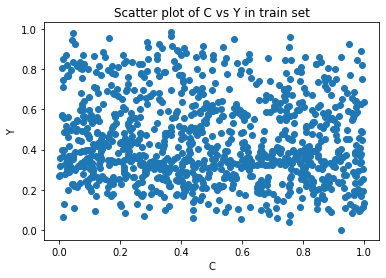

In [9]:
"""
Q2a: Use pandas to load train.csv, val.csv, and test.csv into three separate dataframes. Then, create three scatter plots of the train set with features A, B, and C on the x-axes and Y on the y-axes.

YOUR CODE BELOW, IN THIS CELL
"""
# load train.csv, val.csv, and test.csv into three separate dataframes
train_df = pd.read_csv("https://raw.githubusercontent.com/Astray909/SYSC4415/main/Assignment%201/datasets/train.csv?token=GHSAT0AAAAAAB6ALAK5VR4THWFZNE6WMLSOY65XMRA")
val_df = pd.read_csv("https://raw.githubusercontent.com/Astray909/SYSC4415/main/Assignment%201/datasets/val.csv?token=GHSAT0AAAAAAB6ALAK4KKAFI5PT3DYD77RIY65XNAQ")
test_df = pd.read_csv("https://raw.githubusercontent.com/Astray909/SYSC4415/main/Assignment%201/datasets/test.csv?token=GHSAT0AAAAAAB6ALAK42FBTQ2TPZEGX6ND2Y65XNJA")

# create three scatter plots of the train set with features A on the x-axes and Y on the y-axes
plt.scatter(train_df['A'], train_df['Y'])
plt.xlabel('A');plt.ylabel('Y');plt.title('Scatter plot of A vs Y in train set')
plt.show()

# create three scatter plots of the train set with features B on the x-axes and Y on the y-axes
plt.scatter(train_df['B'], train_df['Y'])
plt.xlabel('B');plt.ylabel('Y');plt.title('Scatter plot of B vs Y in train set')
plt.show()

# create three scatter plots of the train set with features C on the x-axes and Y on the y-axes
plt.scatter(train_df['C'], train_df['Y'])
plt.xlabel('C');plt.ylabel('Y');plt.title('Scatter plot of C vs Y in train set')
plt.show()

In [10]:
"""
Q2b: If you were using A, B, and C to predict Y (i.e., using linear regression), how well do you think these features would perform? Do you think nonlinear functions would fit the data better? Why or why not?

YOUR ANSWER HERE

Feature B will perform the best out of the three features with a linear model, 
feature A will perform poorly because the value for Y varies a lot at the same A value, 
however it still shows a general linear trend. Feature C appears to be more random than both A and B and does not seem linear

Nonlinear functions would not necessarily fit the data better, in the case of this training set, a simple nonelinear model would not fit the data very well, because the dataset exhibit high randomness from first glance
"""

'\nQ2b: If you were using A, B, and C to predict Y (i.e., using linear regression), how well do you think these features would perform? Do you think nonlinear functions would fit the data better? Why or why not?\n\nYOUR ANSWER HERE\n\nFeature B will perform the best out of the three features with a linear model, \nfeature A will perform poorly because the value for Y varies a lot at the same A value, \nhowever it still shows a general linear trend. Feature C appears to be more random than both A and B and does not seem linear\n\nNonlinear functions would not necessarily fit the data better, in the case of this training set, a simple nonelinear model would not fit the data very well, because the dataset exhibit high randomness from first glance\n'

In [11]:
"""
Q2c: The data is already normalized, how can you tell?

YOUR CODE AND ANSWER BELOW, IN THIS CELL

The data is already normalized because all the features have values from 0 to 1.
"""

'\nQ2c: The data is already normalized, how can you tell?\n\nYOUR CODE AND ANSWER BELOW, IN THIS CELL\n\nThe data is already normalized because all the features have values from 0 to 1.\n'

In [22]:
"""
Q2d: For each of the three input features, compute its square-root to create 3 additional features. Repeat for squaring the feature values to create another 3 features.
You now have 9 total input features: A, B, C, sqrt(A), sqrt(B), sqrt(C), A2, B2, C2. 
Do this for all three data splits (train, val, and test). You can think of these as polynomial kernels used in SVMs.

YOUR CODE BELOW, IN THIS CELL
"""
# Train set: compute its square-root to create 3 additional features. Repeat for squaring the feature values to create another 3 features.
train_df['sqrt_A'] = np.sqrt(train_df['A'])
train_df['sqrt_B'] = np.sqrt(train_df['B'])
train_df['sqrt_C'] = np.sqrt(train_df['C'])
train_df['A2'] = np.square(train_df['A'])
train_df['B2'] = np.square(train_df['B'])
train_df['C2'] = np.square(train_df['C'])

# Val set: compute its square-root to create 3 additional features. Repeat for squaring the feature values to create another 3 features.
val_df['sqrt_A'] = np.sqrt(val_df['A'])
val_df['sqrt_B'] = np.sqrt(val_df['B'])
val_df['sqrt_C'] = np.sqrt(val_df['C'])
val_df['A2'] = np.square(val_df['A'])
val_df['B2'] = np.square(val_df['B'])
val_df['C2'] = np.square(val_df['C'])

# Test set: compute its square-root to create 3 additional features. Repeat for squaring the feature values to create another 3 features.
test_df['sqrt_A'] = np.sqrt(test_df['A'])
test_df['sqrt_B'] = np.sqrt(test_df['B'])
test_df['sqrt_C'] = np.sqrt(test_df['C'])
test_df['A2'] = np.square(test_df['A'])
test_df['B2'] = np.square(test_df['B'])
test_df['C2'] = np.square(test_df['C'])

# Print a few lines of each dataframe
print("Train\n")
print(train_df.head(5))
print("Val\n")
print(val_df.head(5))
print("Test\n")
print(test_df.head(5))

Train

          A         B         C         Y  Label    sqrt_A    sqrt_B  \
0  0.433429  0.684660  0.100264  0.554477      5  0.658353  0.827442   
1  0.596584  0.427275  0.972302  0.344430      3  0.772389  0.653663   
2  0.884875  0.566586  0.014994  0.555790      5  0.940678  0.752719   
3  0.145045  0.427584  0.756287  0.228959      2  0.380848  0.653899   
4  0.237964  0.684935  0.348287  0.481648      4  0.487816  0.827608   

     sqrt_C        A2        B2        C2  
0  0.316645  0.187861  0.468759  0.010053  
1  0.986054  0.355913  0.182564  0.945371  
2  0.122450  0.783005  0.321020  0.000225  
3  0.869648  0.021038  0.182828  0.571970  
4  0.590159  0.056627  0.469136  0.121304  
Val

          A         B         C         Y  Label    sqrt_A    sqrt_B  \
0  0.225478  0.417502  0.658253  0.261007      2  0.474845  0.646144   
1  0.730810  0.025166  0.219302  0.300882      2  0.854874  0.158637   
2  0.098021  0.858857  0.857660  0.568094      5  0.313084  0.926745   
3  

**QUESTION 3**

In [ ]:
"""
Q3a: Train a linear regression model on the train set using only the 3 original input features.

YOUR CODE BELOW, IN THIS CELL
"""

In [ ]:
"""
Q3b: What are the mean absolute errors of the train set, val set, and test sets using this model? Did the model overfit the train set?

YOUR CODE AND ANSWER BELOW, IN THIS CELL
"""

In [ ]:
"""
Q3c: What are the values of the 4 learned parameters (3 weights and 1 bias)? Do these values make sense given your scatter plots in Q2a?

YOUR CODE AND ANSWER BELOW, IN THIS CELL
"""

In [ ]:
"""
Q3d: Train another linear regression model using all 9 input features.

YOUR CODE BELOW, IN THIS CELL
"""

In [ ]:
"""
Q3e: What are the mean absolute errors of each dataset, using this new model?

YOUR CODE BELOW, IN THIS CELL
"""

In [ ]:
"""
Q3f: How many learned parameters are there for this model, and what are their values?

YOUR CODE AND ANSWER BELOW, IN THIS CELL
"""

In [ ]:
"""
Q3g: Which model performs better? How can you explain the difference in performance?

YOUR ANSWER HERE
"""

**QUESTION 4**

In [ ]:
"""
Q4a: Use scikit-learn to train a logistic regression model on the train set using only the 3 original features. Again, just use the default hyper-parameters.

YOUR CODE BELOW, IN THIS CELL
"""

In [ ]:
"""
Q4b: What are the overall accuracies of the train, val, and test sets? Use scikit-learn’s accuracy_score metric.

YOUR CODE BELOW, IN THIS CELL
"""

In [ ]:
"""
Q4c: Train another logistic regression model on the train set using all 9 features. If it doesn’t converge, set max_iter to 5,000.

YOUR CODE BELOW, IN THIS CELL
"""

In [ ]:
"""
Q4d: Repeat b, but with your new logistic regression model.

YOUR CODE BELOW, IN THIS CELL
"""

In [ ]:
"""
Q4e: XGBoost is pre-installed on Google Colab. One hyper-parameter is the depth of the tree (called max_depth). Find the optimal value of max_depth, all other hyper-parameters can be ignored for this question.
That is, your model should look like: model = XGBClassifier(max_depth=L).fit(X,y). 
Hint: the test set should not be used to search for hyper-parameters. Train these models using only the 3 original features.

YOUR CODE BELOW, IN THIS CELL
"""

In [ ]:
"""
Q4f: Repeat Step b, but with your new XGBoost model (with the max_depth chosen from e).

YOUR CODE BELOW, IN THIS CELL
"""

In [ ]:
"""
Q4g: Of your 3 models—two logistic regression models and one XGBoost model—which performs best on the test set? Why do you think this is the case?

YOUR ANSWER HERE
"""

**QUESTION 5**

In [ ]:
"""
Q5a: Using all 9 input features, we want to train a linear model (i.e., torch.nn.Linear) to predict the class label.
This is a multi-class classification problem, which of the following loss functions, available in PyTorch, best suits our task? Explain briefly.
torch.nn.CrossEntropyLoss()
torch.nn.MSELoss()
torch.nn.BCELoss()


YOUR ANSWER HERE
"""

In [ ]:
"""
Q5b: Your model will output 10 numbers, one for each class.
These are called logits. Do you need to compute the softmax across these 10 logits before applying your loss function (from a), or does the loss function compute the softmax for you?

YOUR ANSWER HERE
"""

In [ ]:
"""
Q5c: Using the loss function from a, train a linear model using PyTorch and stochastic gradient descent (SGD).
Use a batch size of 1, a learning rate of 0.3 and train for 200 epochs. You can update your model weights “manually” or use an optimizer.

YOUR CODE BELOW, IN THIS CELL
"""

In [ ]:
"""
Q5d: Use the trained model to make predictions on the val and test sets. Calculate the overall accuracy of both sets.

YOUR CODE BELOW, IN THIS CELL
"""

In [ ]:
"""
Q5e: Repeat parts c and d three times. You should get different results each run. There are two main reasons for this. What are they?

YOUR CODE AND ANSWER BELOW, IN THIS CELL
"""